In [6]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import psycopg2 # type: ignore
from dotenv import load_dotenv
import os

In [8]:
load_dotenv()
host = os.getenv("NEONDB_HOST")
database = os.getenv("NEONDB_DATABASE")
user = os.getenv("NEONDB_USER")
password = os.getenv("NEONDB_PASSWORD")
port = os.getenv("NEONDB_PORT")
#print("Database Host:", host)
try:
    conn = psycopg2.connect(
        host=host,
        database=database,
        user=user,
        password=password,
        port=port
    )
    print("Connection successful!")
    cursor = conn.cursor()
    cursor.execute("SELECT version();")
    print("Database version:", cursor.fetchone())
except Exception as e:
    print("Connection failed:", e)

Connection successful!
Database version: ('PostgreSQL 16.6 on x86_64-pc-linux-gnu, compiled by gcc (Debian 10.2.1-6) 10.2.1 20210110, 64-bit',)


In [9]:
query = "SELECT * FROM survey_results_public;"
df = pd.read_sql_query(query, conn)

C:\Users\HP\AppData\Local\Temp\ipykernel_2296\70698897.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [10]:
df

,responseid,mainbranch,age,employment,remotework,checking,codingactivities,edlevel,learncode,learncodeonline,...,jobsatpoints_6,jobsatpoints_7,jobsatpoints_8,jobsatpoints_9,jobsatpoints_10,jobsatpoints_11,surveylength,surveyease,convertedcompyearly,jobsat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,None,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,None,None,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",None,Apples,None,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",None,Apples,None,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,65433,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,Apples,Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","On the job training;School (i.e., University, ...",None,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN
65433,65434,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN
65434,65435,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Social ...,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN
65435,65436,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,0.0,0.0,0.0,0.0,0.0,0.0,None,None,NaN,NaN


In [12]:
df = df[["country", "edlevel", "yearscodepro", "employment", "convertedcompyearly"]]
df = df.rename({"convertedcompyearly": "salary"}, axis = 1)
df

,country,edlevel,yearscodepro,employment,salary
0,United States of America,Primary/elementary school,NaN,"Employed, full-time",NaN
1,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17.0,"Employed, full-time",NaN
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27.0,"Employed, full-time",NaN
3,Canada,Some college/university study without earning ...,NaN,"Student, full-time",NaN
4,Norway,"Secondary school (e.g. American high school, G...",NaN,"Student, full-time",NaN
...,...,...,...,...,...
65432,None,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3.0,"Employed, full-time",NaN
65433,None,None,NaN,"Employed, full-time",NaN
65434,None,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5.0,"Employed, full-time",NaN
65435,Germany,"Secondary school (e.g. American high school, G...",2.0,"Employed, full-time",NaN


In [13]:
df = df[df["salary"].notnull()]
df

,country,edlevel,yearscodepro,employment,salary
29,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",27.0,"Employed, full-time",184712.0
55,India,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5.0,"Employed, full-time",6700.0
79,Pakistan,"Secondary school (e.g. American high school, G...",1.0,"Employed, full-time;Student, full-time;Indepen...",7322.0
83,Nepal,"Secondary school (e.g. American high school, G...",1.0,"Employed, full-time",4000.0
101,Egypt,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6.0,"Independent contractor, freelancer, or self-em...",32222.0
...,...,...,...,...,...
41223,Ukraine,Some college/university study without earning ...,6.0,"Employed, full-time;Employed, part-time",15600.0
41224,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",3.0,"Employed, full-time",44640.0
41228,United States of America,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",30.0,"Employed, full-time",170000.0
41229,United States of America,Some college/university study without earning ...,1.0,"Student, full-time;Employed, part-time",12000.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23435 entries, 29 to 41230
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       23435 non-null  object 
 1   edlevel       23435 non-null  object 
 2   yearscodepro  23345 non-null  float64
 3   employment    23435 non-null  object 
 4   salary        23435 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.1+ MB


In [15]:
df = df.dropna()
df.isnull().sum()

country         0
edlevel         0
yearscodepro    0
employment      0
salary          0
dtype: int64

In [17]:
df = df[df["employment"] == "Employed, full-time"]
df = df.drop("employment", axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17527 entries, 29 to 41228
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       17527 non-null  object 
 1   edlevel       17527 non-null  object 
 2   yearscodepro  17527 non-null  float64
 3   salary        17527 non-null  float64
dtypes: float64(2), object(2)
memory usage: 684.6+ KB


In [18]:
df["country"].value_counts()

country
United States of America                                3903
Germany                                                 1491
United Kingdom of Great Britain and Northern Ireland    1141
Ukraine                                                 1017
India                                                    836
                                                        ... 
Guyana                                                     1
Sierra Leone                                               1
Namibia                                                    1
Benin                                                      1
Mali                                                       1
Name: count, Length: 155, dtype: int64

In [19]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [23]:
country_map = shorten_categories(df.country.value_counts(), 400)
df['country'] = df['country'].map(country_map)
df.country.value_counts()

country
Other                                                   5628
United States of America                                3903
Germany                                                 1491
United Kingdom of Great Britain and Northern Ireland    1141
Ukraine                                                 1017
India                                                    836
France                                                   719
Canada                                                   684
Brazil                                                   457
Spain                                                    431
Italy                                                    414
Netherlands                                              406
Australia                                                400
Name: count, dtype: int64

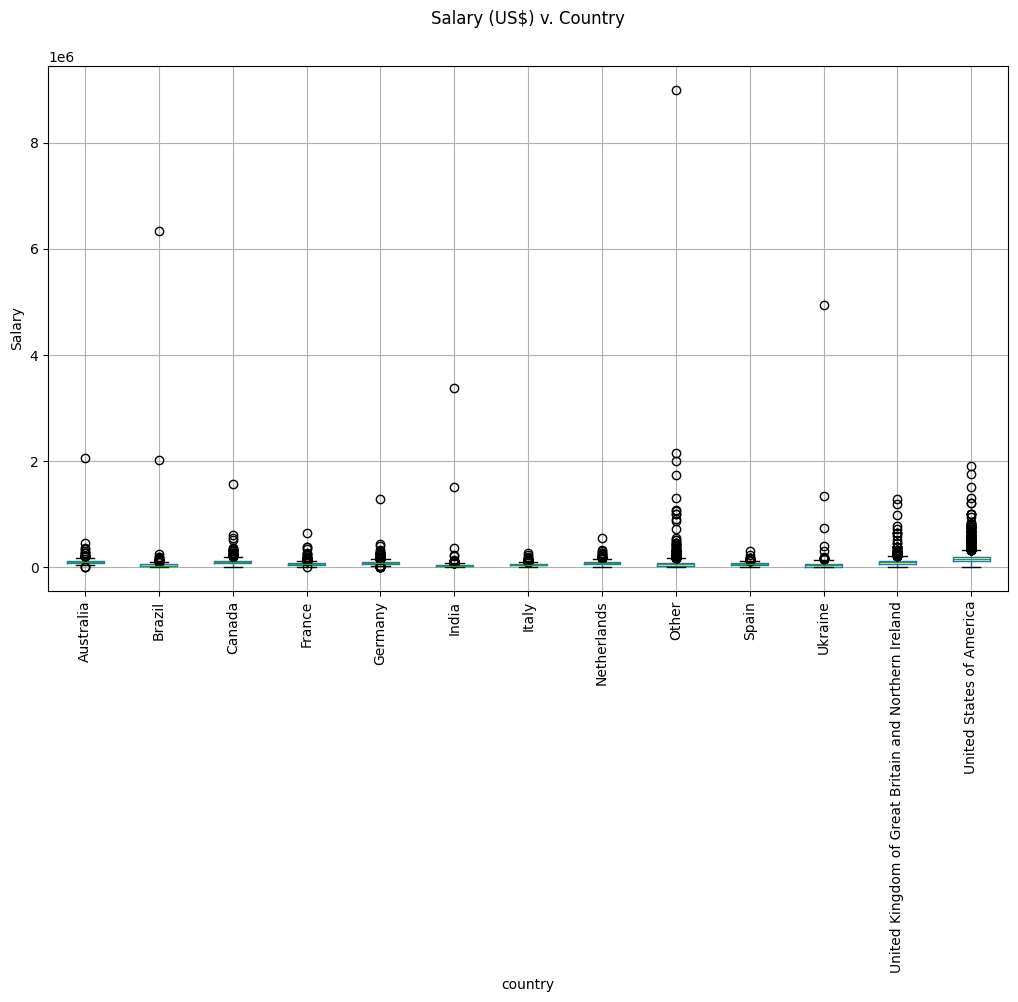

In [25]:
fig, ax = plt.subplots(1, 1, figsize = (12, 7))
df.boxplot('salary', 'country', ax = ax)
plt.suptitle('Salary (US$) v. Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation = 90)
plt.show()

In [26]:
df = df[df['salary'] <= 250000]
df = df[df['salary'] >= 10000]
df = df[df['country'] != 'Other']

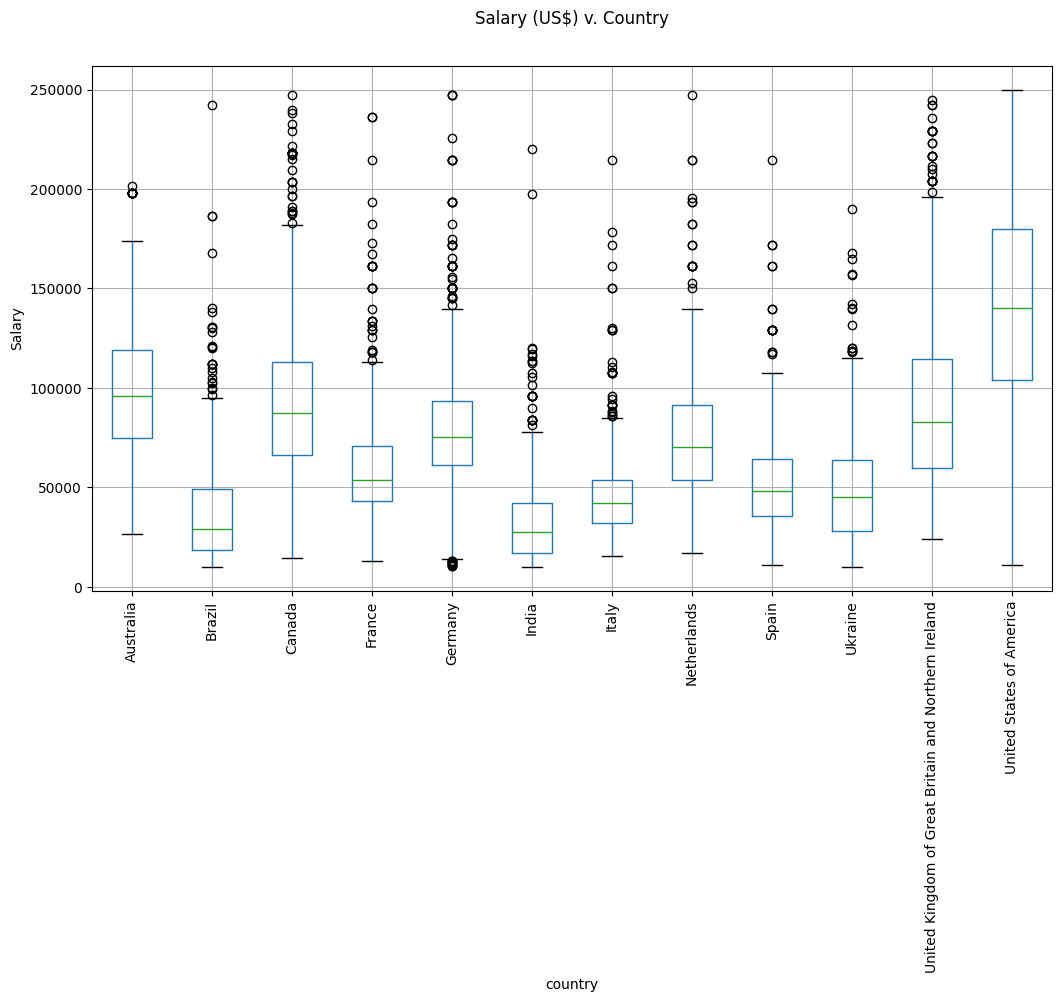

In [27]:
fig, ax = plt.subplots(1, 1, figsize = (12, 7))
df.boxplot('salary', 'country', ax = ax)
plt.suptitle('Salary (US$) v. Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation = 90)
plt.show()

In [28]:
df['yearscodepro'].unique()

array([27. ,  6. ,  5. , 18. , 25. , 30. , 50. ,  1. , 15. , 11. , 23. ,
       17. , 10. ,  8. , 12. , 26. , 40. ,  4. ,  9. , 22. , 28. , 20. ,
       16. , 13. ,  3. , 35. , 31. , 41. , 36. , 14. ,  7. ,  0.5, 24. ,
        2. , 38. , 32. , 21. , 19. , 34. , 29. , 43. , 33. , 45. , 37. ,
       44. , 42. , 39. , 46. , 49. , 48. , 47. ])

In [29]:
def clean_experience(x):
    if x == 'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['yearscodepro'] = df['yearscodepro'].apply(clean_experience)

In [30]:
df['edlevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)', 'Primary/elementary school',
       'Something else'], dtype=object)

In [31]:
def clean_education(x):
    if "Bachelor’s degree" in x:
        return "Bachelor's degree"
    if "Master’s degree" in x:
        return "Master's degree"
    if "Professional degree" in x:
        return "Post grad"
    return "Less than a Bachelor's"

df['edlevel'] = df['edlevel'].apply(clean_education)

In [32]:
df['edlevel'].unique()

array(["Bachelor's degree", "Master's degree", 'Post grad',
       "Less than a Bachelor's"], dtype=object)

In [33]:
from sklearn.preprocessing import LabelEncoder # type: ignore
le_education = LabelEncoder()
df['edlevel'] = le_education.fit_transform(df['edlevel'])
df['edlevel'].unique()

array([0, 2, 3, 1])

In [34]:
le_country = LabelEncoder()
df['country'] = le_country.fit_transform(df['country'])
df['country'].unique()

array([10,  4, 11,  3,  1,  2,  6,  5,  9,  8,  7,  0])

In [35]:
x = df.drop('salary', axis = 1)
y = df['salary']

In [36]:
from sklearn.linear_model import LinearRegression # type: ignore
lin_reg = LinearRegression()
lin_reg.fit(x, y.values)

LinearRegression()

In [37]:
y_pred = lin_reg.predict(x)

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error # type: ignore
error = np.sqrt(mean_squared_error(y, y_pred))
error

45073.43634339027

In [39]:
from sklearn.tree import DecisionTreeRegressor # type: ignore
dec_reg = DecisionTreeRegressor()
dec_reg.fit(x, y.values)

DecisionTreeRegressor()

In [40]:
y_pred = dec_reg.predict(x)

In [41]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.2f}".format(error))

$31,646.22


In [42]:
from sklearn.ensemble import RandomForestRegressor # type: ignore
ran_reg = RandomForestRegressor()
ran_reg.fit(x, y.values)

RandomForestRegressor()

In [43]:
y_pred = ran_reg.predict(x)

In [44]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.2f}".format(error))

$31,778.83


In [45]:
from sklearn.model_selection import GridSearchCV # type: ignore
max_depth = [None, 2, 4, 6, 8, 10, 12]
parameters = {'max_depth': max_depth}

regressor = DecisionTreeRegressor(random_state = 0)
gs = GridSearchCV(regressor, parameters, scoring = 'neg_mean_squared_error')
gs.fit(x, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [46]:
regressor = gs.best_estimator_

regressor.fit(x, y.values)
y_pred = regressor.predict(x)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.2f}".format(error))

$33,603.23


In [47]:
x

,country,edlevel,yearscodepro
29,10,0,27.0
110,4,2,6.0
364,4,2,5.0
408,10,3,18.0
411,10,2,25.0
...,...,...,...
41203,10,1,5.0
41207,11,0,2.0
41208,11,0,13.0
41211,11,1,25.0


In [48]:
#testing with a sample row
x = np.array([['United States of America', "Master's degree", 15]])
x

array([['United States of America', "Master's degree", '15']],
      dtype='<U24')

In [49]:
x[:, 0] = le_country.transform(x[:, 0])
x[:, 1] = le_education.transform(x[:, 1])
x = x.astype(float)
x

array([[11.,  2., 15.]])

In [50]:
y_pred = regressor.predict(x)
y_pred

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([151817.5])

In [51]:
import pickle
data = {'model': regressor, 'le_country': le_country, 'le_education': le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [52]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data['model']
le_country = data['le_country']
le_education = data['le_education']

In [53]:
y_pred = regressor_loaded.predict(x)
y_pred

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([151817.5])